In [3]:
# Import packages
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup 
import requests 
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Define the url 
url = "https://www.gutenberg.org/files/2701/2701-h/2701-h.htm"

In [12]:
re = requests.get(url)

In [13]:
# creat a beautifulSoup object from html
soup = BeautifulSoup(re.content, 'html.parser')

In [21]:
para = soup.get_text()

In [40]:
# finding all the wrods in the Novel
tokenizer = RegexpTokenizer(r'\w+')

In [42]:
tokens = tokenizer.tokenize(para)

In [72]:
# creating a list of the novel with all the words lower cased
word =[] 
for words in tokens :
    word.append(words.lower())

In [51]:
# using Natural Language Toolkit to find the common words ( a, the , he ..)
stop_words = set(stopwords.words('english'))

In [73]:
# removing the common words from the list
final_words= [ x for x in word if x not in stop_words] 

In [91]:
sns.set_theme(style="whitegrid", palette="pastel")

In [76]:
# creating a set with each word an frequence 
freqList1 = nltk.FreqDist(final_words)

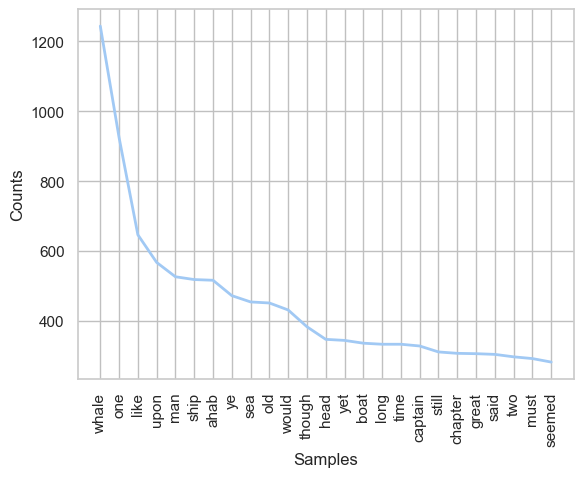

<Axes: xlabel='Samples', ylabel='Counts'>

In [103]:
#plotting the frequence of top 25 used words in the novel

freqList1.plot(25)


In [24]:
# creating a function that takes URL and extra words that need to be removed
def visualizeFirst25(ur= "https://www.gutenberg.org/files/2701/2701-h/2701-h.htm", remo =[] ) :
    # Define the URL
    url = ur
    r = requests.get(url)

    # Create a BeautifulSoup object from HTML
    soup = BeautifulSoup(r.content, 'html.parser')

    # Extract the text from the page
    text = soup.get_text()

    # Tokenize the text into words
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    if len(remo) !=0 :
        stop_words.update(remo)
    
    words = [word for word in words if word not in stop_words]
   
    # Find the frequency of each word
    freqDist = nltk.FreqDist(words)

    # Create a DataFrame with the frequencies
    df = pd.DataFrame({'word': list(freqDist.keys()), 'count': list(freqDist.values())})

    # Sort the DataFrame by frequency
    df = df.sort_values('count', ascending=False)

    # Plot the top 25 words
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,8))
    sns.lineplot(x='word', y='count', data=df.head(25))
    plt.xticks(rotation=90)
    plt.title('Top 25 Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    


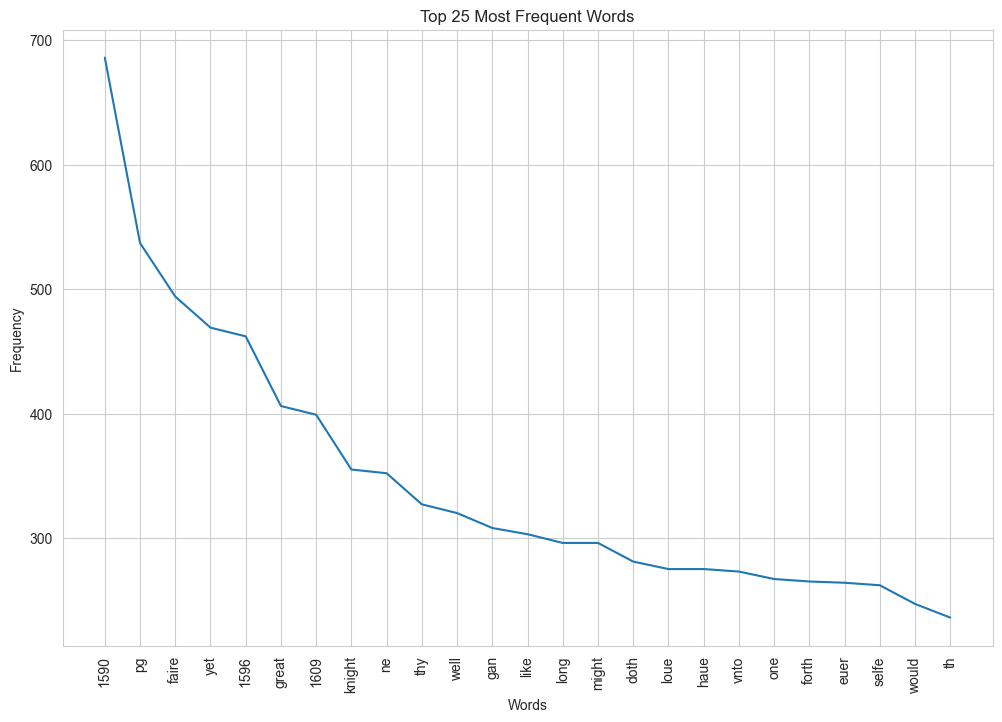

In [25]:
visualizeFirst25(ur="https://www.gutenberg.org/cache/epub/70717/pg70717-images.html")